# Boston Housing Price Prediction

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LinearRegression
import pickle
sns.set_theme(style='darkgrid', palette='deep')

### Loading and exploring dataset

In [2]:
df_ = pd.read_csv("data_final.csv")

In [3]:
df_.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


``` What does column mean? 
    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per $10,000
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
    13. LSTAT    percent lower status of the population
    14. MEDV     Median value of owner-occupied homes in $1000's ```

In [4]:
df_.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284338,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702085,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.210000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.618750,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [6]:
df_.shape

(506, 14)

- The above result shows us the basic information of data.
- There is no missing values in the dataset

### Basic Data Analysis

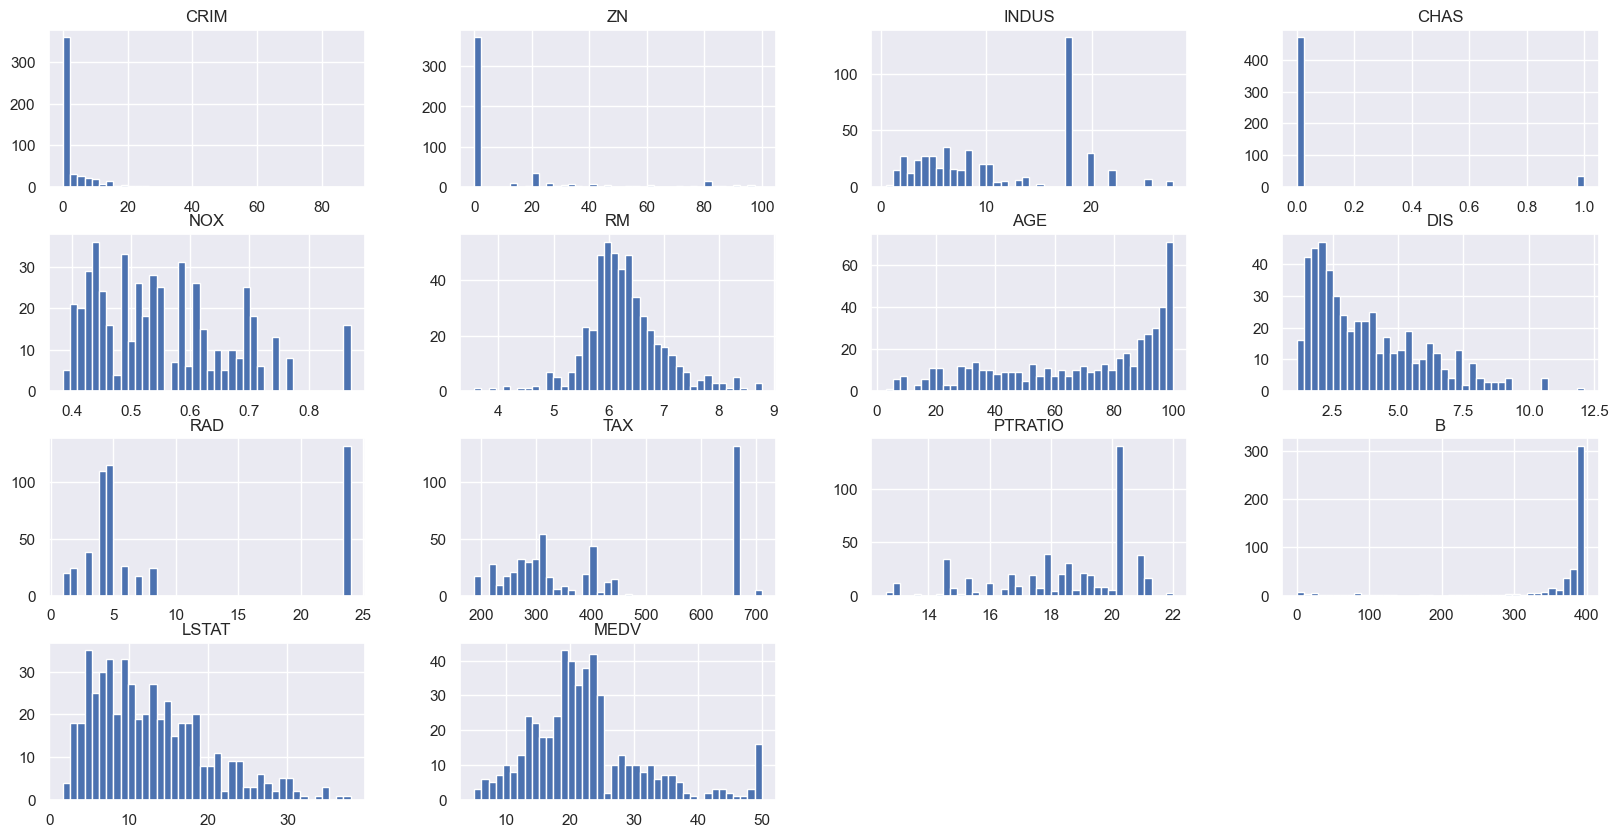

In [7]:
df_.hist(bins=40, figsize=(20,10))
plt.show()

- Above histogram shows us histograms of each column of the dataset, providing us brief insights about dataset

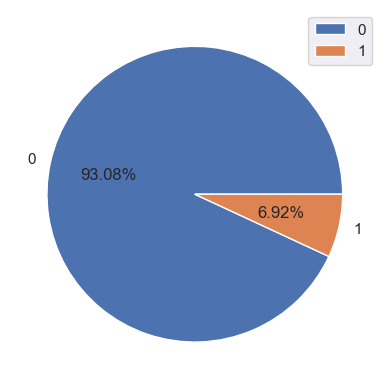

In [8]:
#chas is a categorical data
plt.pie(df_["CHAS"].value_counts(), labels=[0,1], autopct="%.2f%%")
plt.legend()
plt.show()

- CHAS is a categorical data being either 0/1. 
- Understanding the distribution of values of CHAS, we understood that its highly biased to 0. Therefore, Stratified split will be required for making a good model.

### Stratified Shuffle Splitting the data

In [9]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in sss.split(df_, df_["CHAS"]):
    df_train = df_.loc[train_index]
    df_test = df_.loc[test_index]

### Understanding correlationg between features.

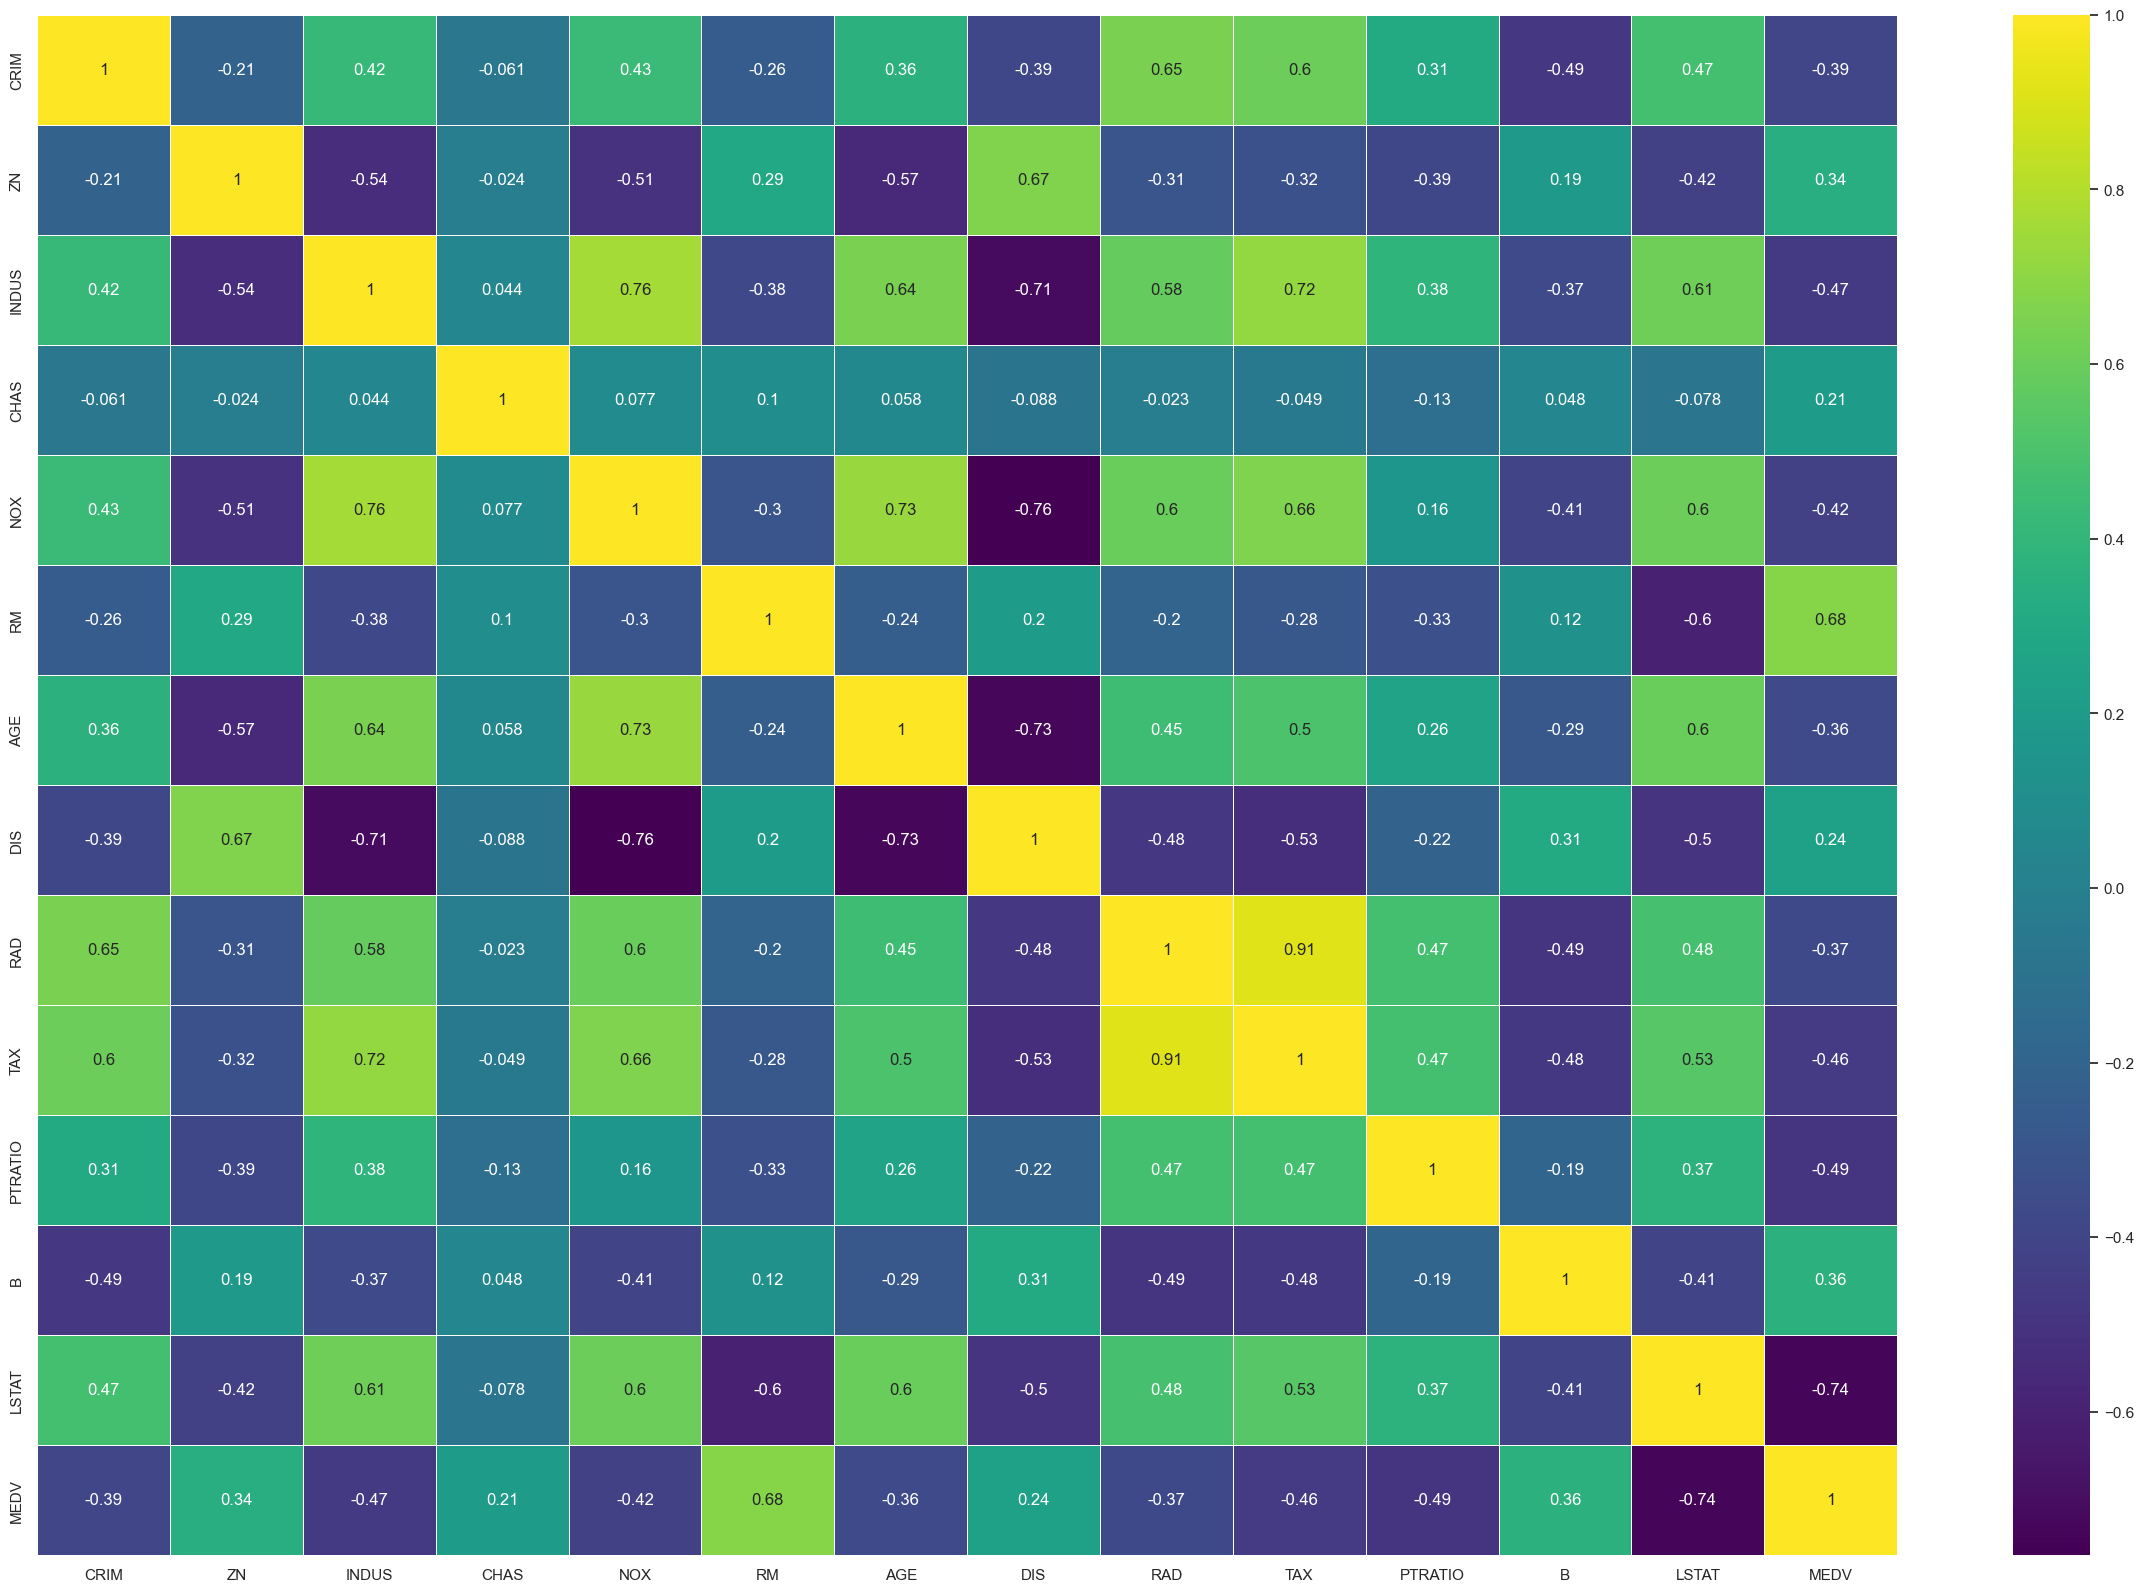

In [10]:
plt.figure(figsize = (30,20))
sns.heatmap(df_train.corr(), linewidth=0.5, cmap="viridis",annot=True)
plt.show()

Heatmap is used to understand the correlation between the features. Some features are identified and further visualized

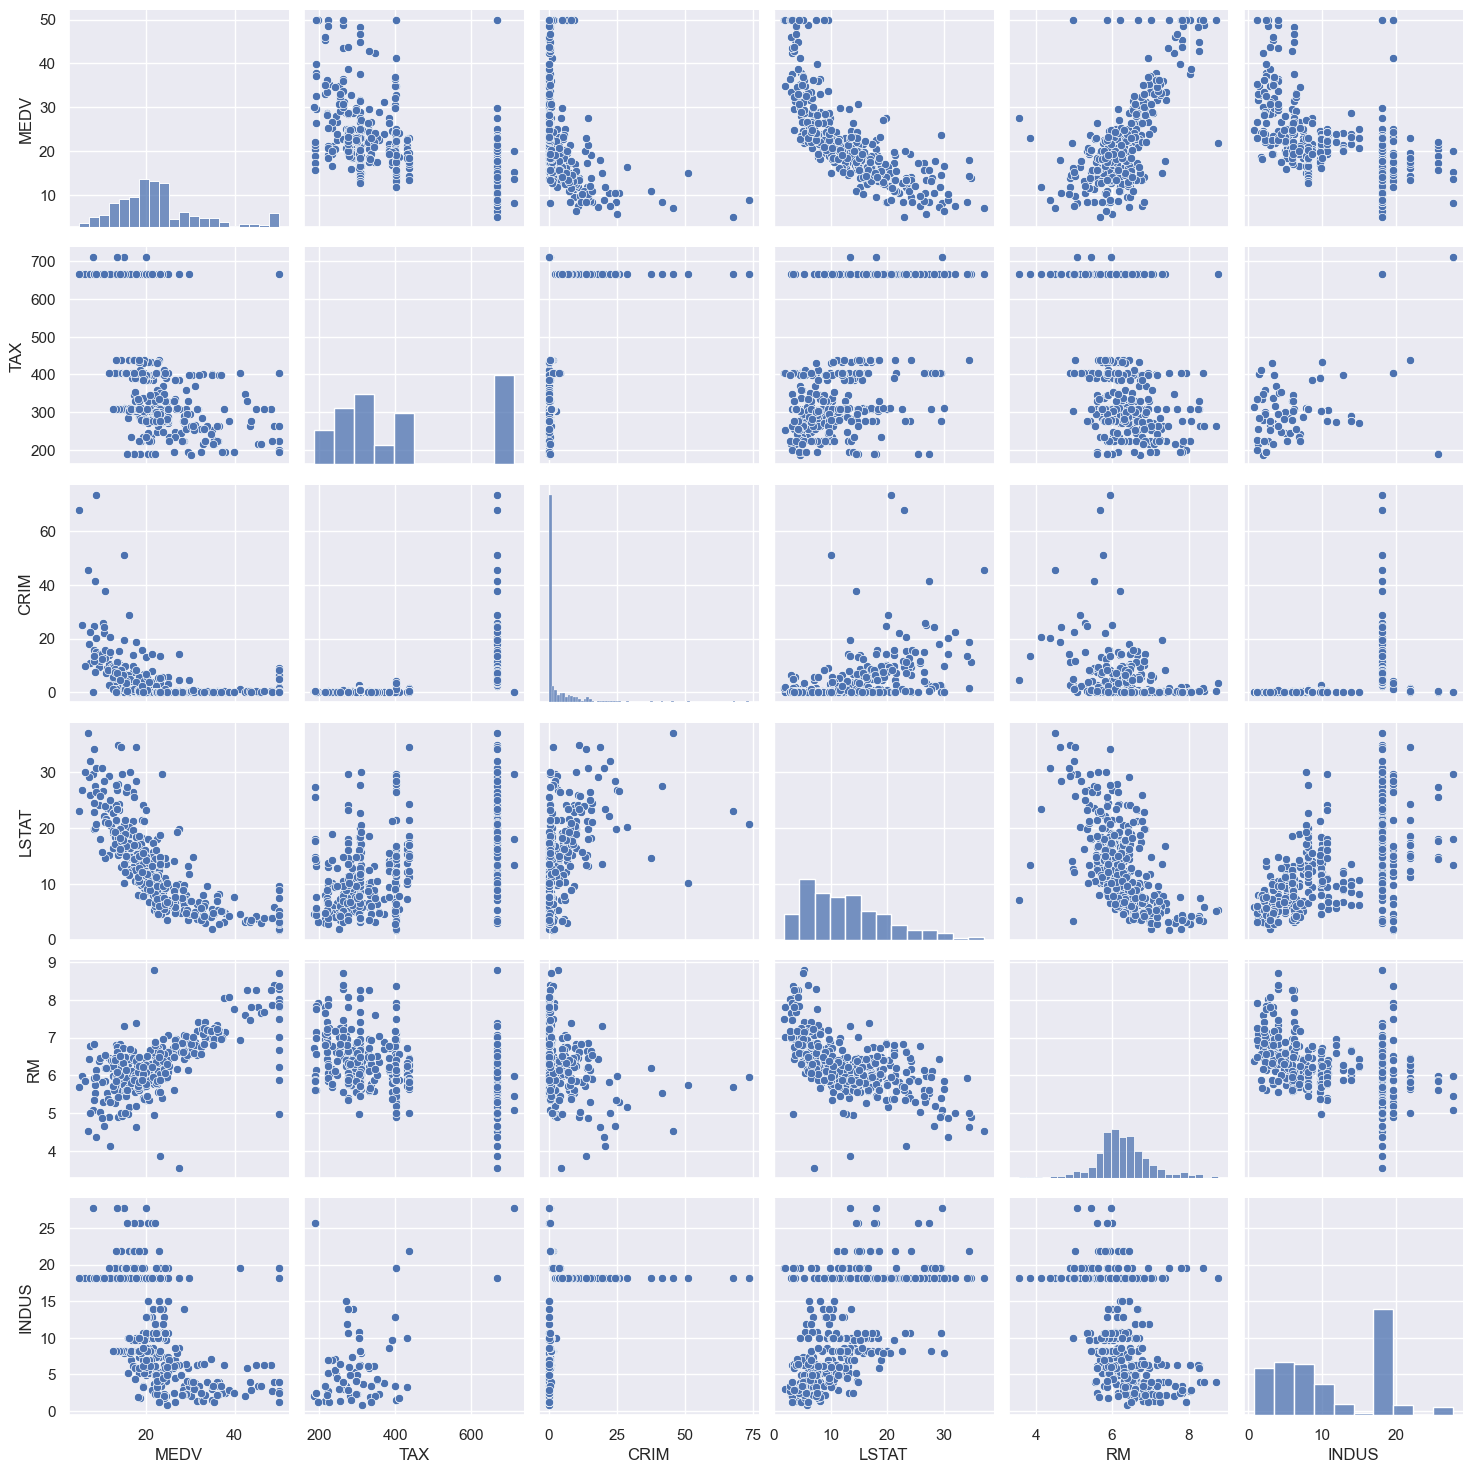

In [11]:
sns.pairplot(df_train[["MEDV", "TAX", "CRIM", "LSTAT", "RM", "INDUS"]])
plt.show()

On further visualizing data, we get an insight of strong correlation between LSTAT, RM and Property Value (MEDV)

### Preperation for model

In [12]:
#Splitting the stratified dataset to dependent and independent variable
X_train = df_train.iloc[:,:-1]
y_train = df_train.iloc[:,-1]
X_test = df_test.iloc[:,:-1]
y_test = df_test.iloc[:, -1]

#### Standardization of the values

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [14]:
X_train = scaler.fit_transform(X_train)

In [15]:
X_test = scaler.transform(X_test)

In [ ]:
pickle.dump(scaler, open("scaler.pkl", "wb"))

#### Linear Regression model

In [16]:
Regressor = LinearRegression()

In [17]:
Regressor.fit(X_train, y_train)

LinearRegression()

#### Predicting the values

In [18]:
y_pred = Regressor.predict(X_test)

### Model Evaluation

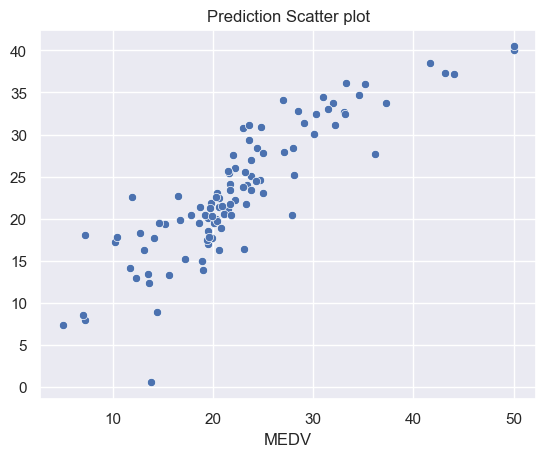

In [19]:
sns.scatterplot(x= y_test,y=y_pred)
plt.title("Prediction Scatter plot")
plt.show()

The prediction plot, it showing linearity which indicates that model has done well 

In [20]:
residuals = y_test - y_pred

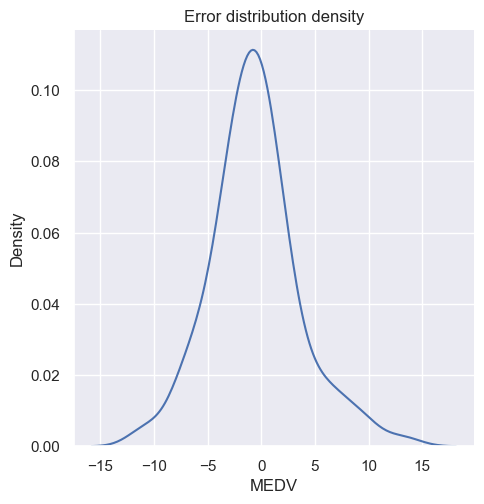

In [21]:
sns.displot(residuals, kind="kde")
plt.title("Error distribution density")
plt.show()

Here, the majority of the prediction have errors nearly zero though some error values range over +/-5 but overall, model performs quite well

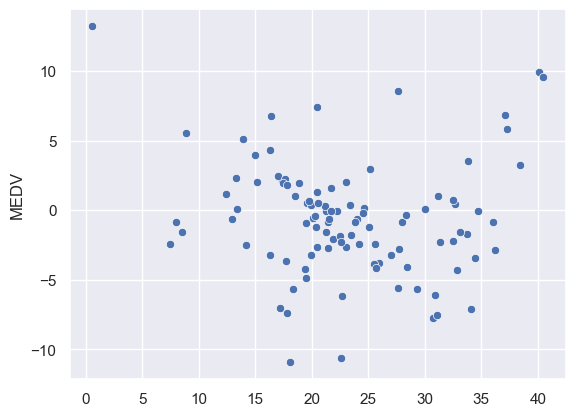

In [22]:
sns.scatterplot(x=y_pred, y=residuals)
plt.show()

The plot is uniformly distributed, indicating a good plot

In [23]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

17.16734089507225
3.066549475044057
0.7573236136441108


### Prediction on New Data

In [24]:
X_test[3].reshape(1,-1)

array([[-0.43125377, -0.4898311 ,  0.37049623,  3.66450153, -0.06907906,
         0.13137113,  0.82769155, -0.18264601, -0.5429938 , -0.80932303,
        -0.97491834,  0.42050096, -0.31709962]])

In [25]:
point_of_prediction = scaler.transform(X_test[3].reshape(1,-1))

C:\Anacondadown\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [26]:
Regressor.predict(point_of_prediction)

array([51.82912237])

### Pickling of model

In [28]:
pickle.dump(Regressor, open("regmodel.pkl", "wb"))